In [1]:
from phw_lib import *

In [2]:
np.random.seed(1)
# visualize walkouts for spectral peaks of sin wave and pure noise
fs = 0.5
dt = 1/fs
time_duration = 120000
n_samples = int(time_duration/dt)
t = np.arange(0, time_duration, dt)
freqs = np.fft.fftfreq(len(t), dt)

search_lower_range = 3.2*1e-3
search_upper_range = 6*1e-3

lower_freq = 3*1e-3
upper_freq = 12*1e-3

sin_wave_freq = 9*1e-3
sin_wave_phase = 0.75
sin_wave_amp = 5.0*1e-2
sin_wave = sin_wave_amp * np.sin(2 * np.pi * sin_wave_freq * t + sin_wave_phase)
# the closest frequceny to the sin wave frequency
sin_peak_pos = np.argmin(np.abs(freqs - sin_wave_freq))

noise = np.random.normal(0, 1, size=n_samples)
c_map_code = 'viridis'

# if load the data from the saved file
noise = np.random.normal(0, 1, size=n_samples)

# find the peak with maximum amplitude within the frequency range
fft_amp = np.abs(np.fft.fft(noise))
peaks, _ = find_peaks(fft_amp, distance=10)
peaks = peaks[np.logical_and(freqs[peaks] > search_lower_range, freqs[peaks] < search_upper_range)]
#R_2_values = [calculate_walkout_R2(noise, dt, freqs[peak])[1]**2 for peak in peaks]
#max_peak = peaks[np.argmax(R_2_values)]
max_peak = peaks[np.argmax(fft_amp[peaks])]

target_freq_1 = sin_wave_freq
target_freq_2 = freqs[max_peak]

noise_plus_sin = noise + sin_wave

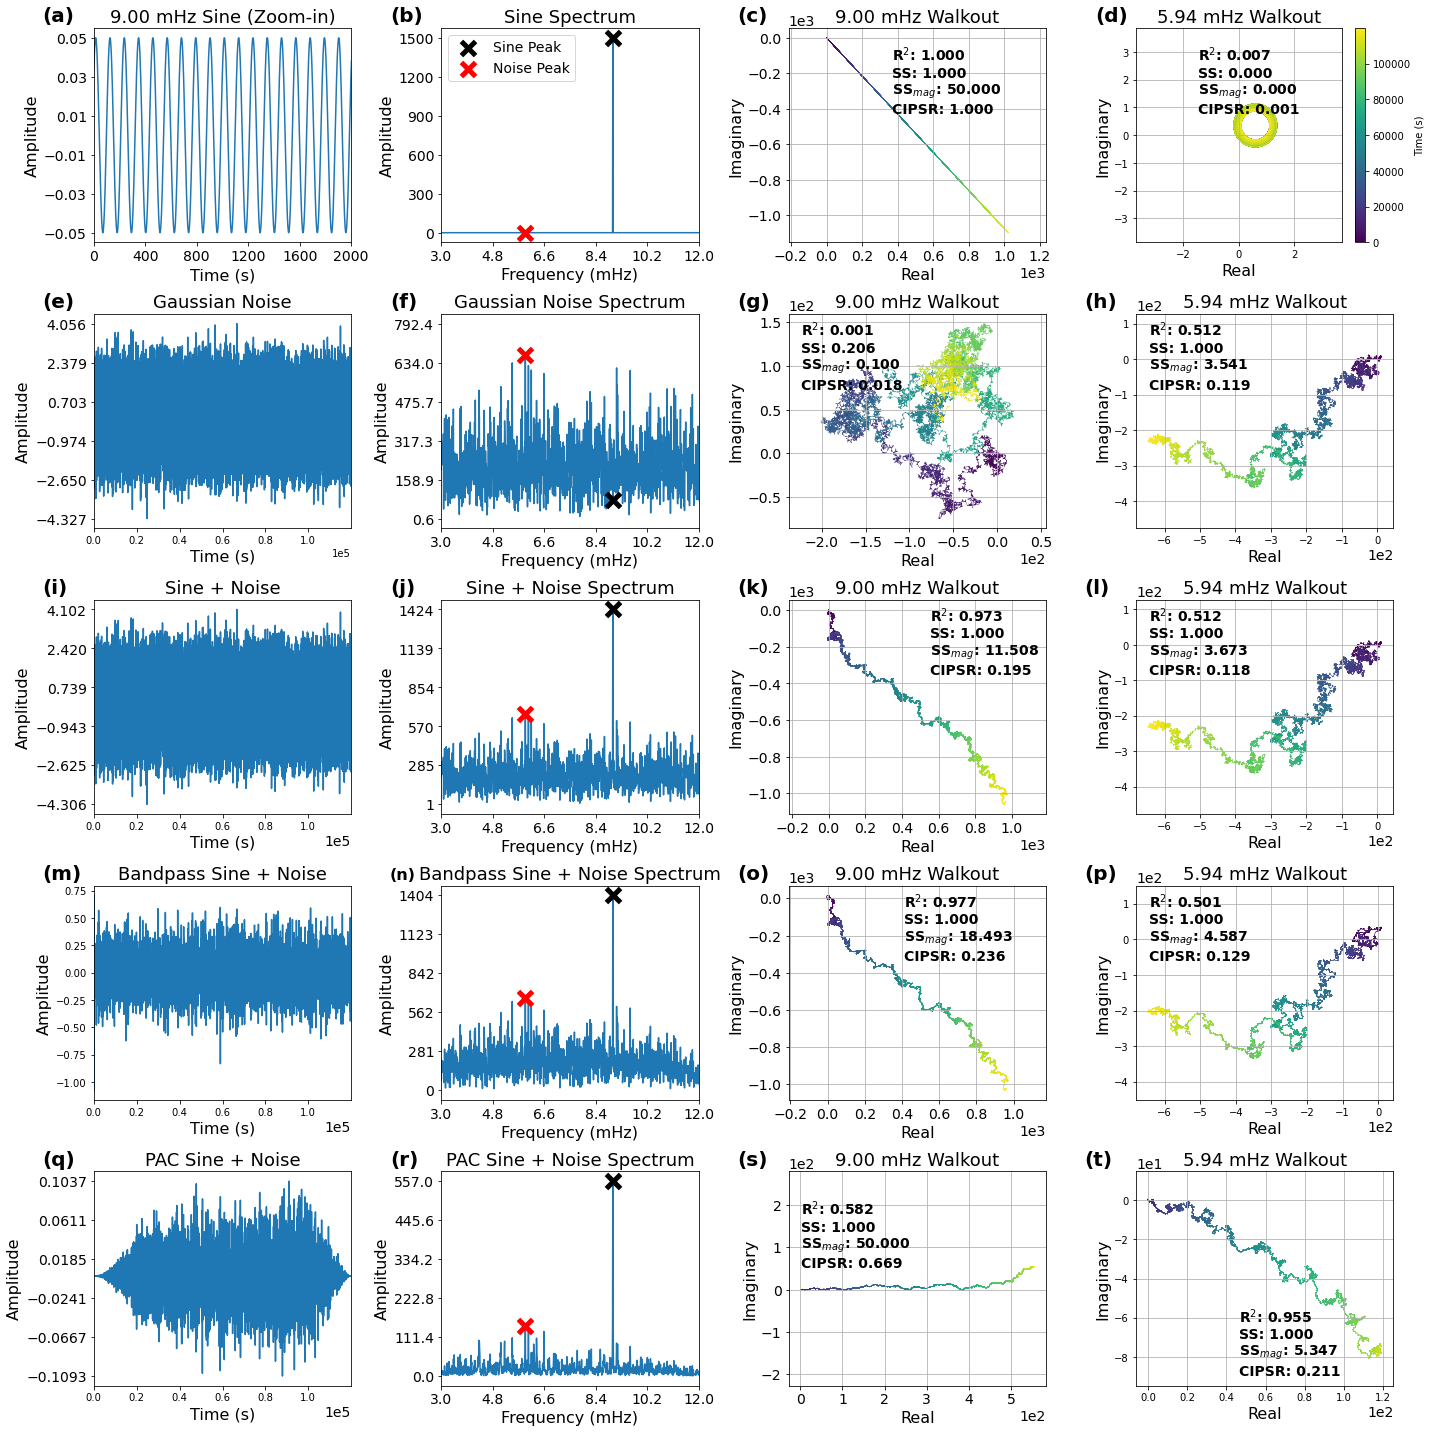

In [3]:
plt.figure(figsize=(20, 20))
plt.subplot(5, 4, 1)
# sine wave
plt.plot(t, sin_wave)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[1000]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('{:.2f} mHz Sine (Zoom-in)'.format(sin_wave_freq*1e3), fontsize=18)
plt.xticks(np.arange(t[0], t[1000]*1.0001, (t[1000]-t[0])/5), fontsize=14)
plt.yticks(np.arange(np.min(sin_wave), np.max(sin_wave)*1.0001, (np.max(sin_wave)-np.min(sin_wave))/5), fontsize=14)
# add (a) to the subplot
plt.text(-0.2, 1.03, '(a)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 2)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(sin_wave))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(sin_wave))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(sin_wave))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine Spectrum'.format(sin_wave_freq*1e3), fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (b) to the subplot
plt.text(-0.2, 1.03, '(b)', transform=plt.gca().transAxes, size=20, weight='bold')
plt.legend(fontsize=14, loc='upper left')

plt.subplot(5, 4, 3)
visualize_walkout_for_subplot(sin_wave, dt, target_freq_1)
R2 = calculate_walkout_R2(sin_wave, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(sin_wave, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(sin_wave, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.40, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (c) to the subplot
plt.text(-0.2, 1.03, '(c)', transform=plt.gca().transAxes, size=20, weight='bold')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')

plt.subplot(5, 4, 4)
visualize_walkout_for_subplot(sin_wave, dt, target_freq_2)
R2 = calculate_walkout_R2(sin_wave, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(sin_wave, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(sin_wave, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.30, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
plt.xlim([-4,4])
plt.ylim([-4,4])
# add (d) to the subplot
plt.text(-0.2, 1.03, '(d)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 5)
plt.plot(t, noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ylabel('Amplitude', fontsize=16)
plt.title('Gaussian Noise', fontsize=18)
plt.yticks(np.arange(np.min(noise), np.max(noise)*1.0001, (np.max(noise)-np.min(noise))/5), fontsize=14)
# add (e) to the subplot
plt.text(-0.2, 1.03, '(e)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 6)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(noise))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(noise))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(noise))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Gaussian Noise Spectrum', fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (f) to the subplot
plt.text(-0.2, 1.03, '(f)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 7)
visualize_walkout_for_subplot(noise, dt, target_freq_1)
R2 = calculate_walkout_R2(noise, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(noise, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.05, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (g) to the subplot
plt.text(-0.2, 1.03, '(g)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 8)
visualize_walkout_for_subplot(noise, dt, target_freq_2)
R2 = calculate_walkout_R2(noise, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(noise, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.05, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
# add (h) to the subplot
plt.text(-0.2, 1.03, '(h)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 9)
plt.plot(t, noise_plus_sin)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine + Noise', fontsize=18)
plt.yticks(np.arange(np.min(noise_plus_sin), np.max(noise_plus_sin)*1.0001, (np.max(noise_plus_sin)-np.min(noise_plus_sin))/5), fontsize=14)
# add (i) to the subplot
plt.text(-0.2, 1.03, '(i)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 10)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(noise_plus_sin))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(noise_plus_sin))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(noise_plus_sin))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine + Noise Spectrum', fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (j) to the subplot
plt.text(-0.2, 1.03, '(j)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 11)
visualize_walkout_for_subplot(noise_plus_sin, dt, target_freq_1)
R2 = calculate_walkout_R2(noise_plus_sin, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(noise_plus_sin, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise_plus_sin, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.55, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (k) to the subplot
plt.text(-0.2, 1.03, '(k)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 12)
visualize_walkout_for_subplot(noise_plus_sin, dt, target_freq_2)
R2 = calculate_walkout_R2(noise_plus_sin, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(noise_plus_sin, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise_plus_sin, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.05, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
# add (l) to the subplot
plt.text(-0.2, 1.03, '(l)', transform=plt.gca().transAxes, size=20, weight='bold')

# bandpass filter the data
lowpass_noise = butter_bandpass_filter(noise_plus_sin, lower_freq, upper_freq, fs, order=4)
lowpass_noise = lowpass_noise - np.mean(lowpass_noise)

plt.subplot(5, 4, 13)
plt.plot(t, lowpass_noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('Bandpass Sine + Noise', fontsize=18)
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14) 
# add (m) to the subplot
plt.text(-0.2, 1.03, '(m)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 14)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(lowpass_noise))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(lowpass_noise))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(lowpass_noise))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Bandpass Sine + Noise Spectrum', fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (n) to the subplot
plt.text(-0.2, 1.03, '(n)', transform=plt.gca().transAxes, size=16, weight='bold')

plt.subplot(5, 4, 15)
visualize_walkout_for_subplot(lowpass_noise, dt, target_freq_1)
R2 = calculate_walkout_R2(lowpass_noise, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(lowpass_noise, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_noise, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.45, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (o) to the subplot
plt.text(-0.2, 1.03, '(o)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 16)
visualize_walkout_for_subplot(lowpass_noise, dt, target_freq_2)
R2 = calculate_walkout_R2(lowpass_noise, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(lowpass_noise, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_noise, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.05, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
# add (p) to the subplot
plt.text(-0.2, 1.03, '(p)', transform=plt.gca().transAxes, size=20, weight='bold')

# phase autocorrelation
pac_lowpass_noise = acorr(lowpass_noise)
# taper the data
pac_lowpass_noise = pac_lowpass_noise - np.mean(pac_lowpass_noise)
pac_lowpass_noise = np.multiply(pac_lowpass_noise, signal.tukey(len(pac_lowpass_noise), alpha=0.5))

pac_t = t
pac_freqs = np.fft.fftfreq(len(pac_t), dt)
# find amplitude of the peak with maximum amplitude within the frequency range
fft_amp = np.abs(np.fft.fft(pac_lowpass_noise))
peaks, _ = find_peaks(fft_amp, distance=10)

peaks = peaks[np.logical_and(pac_freqs[peaks] > search_lower_range, pac_freqs[peaks] < search_upper_range)]
# sort the peaks by their amplitudes and select the top 3 peaks
peaks = peaks[np.argsort(fft_amp[peaks])][::-1]
pac_max_peak = peaks[0]

pac_sin_peak_pos = np.argmin(np.abs(pac_freqs - sin_wave_freq))

plt.subplot(5, 4, 17)
plt.plot(pac_t, pac_lowpass_noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([pac_t[0], pac_t[-1]])
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14) 
plt.ylabel('Amplitude', fontsize=16)
plt.title('PAC Sine + Noise', fontsize=18)
plt.yticks(np.arange(np.min(pac_lowpass_noise), np.max(pac_lowpass_noise)*1.0001, (np.max(pac_lowpass_noise)-np.min(pac_lowpass_noise))/5), fontsize=14)
# add (q) to the subplot
plt.text(-0.2, 1.03, '(q)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 18)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(pac_lowpass_noise))[:int(len(pac_freqs)/2)]
plt.plot(pac_freqs[:int(len(pac_freqs)/2)], spectrum_amp)
plt.scatter(pac_freqs[pac_sin_peak_pos], np.abs(np.fft.fft(pac_lowpass_noise))[pac_sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(pac_freqs[pac_max_peak], np.abs(np.fft.fft(pac_lowpass_noise))[pac_max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('PAC Sine + Noise Spectrum', fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (r) to the subplot
plt.text(-0.2, 1.03, '(r)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 19)
visualize_walkout_for_subplot(pac_lowpass_noise, dt, target_freq_1)
R2 = calculate_walkout_R2(pac_lowpass_noise, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_noise, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_noise, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.05, 0.55, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (s) to the subplot
plt.text(-0.2, 1.03, '(s)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 20)
visualize_walkout_for_subplot(pac_lowpass_noise, dt, target_freq_2)
R2 = calculate_walkout_R2(pac_lowpass_noise, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_noise, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_noise, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.40, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
# add (t) to the subplot
plt.text(-0.2, 1.03, '(t)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.tight_layout()
plt.savefig('./Figure4.jpg', dpi=600)
plt.show()
plt.close()

In [4]:
np.random.seed(1)
# visualize walkouts for spectral peaks of sin wave and pure noise
fs = 0.5
dt = 1/fs
time_duration = 120000
n_samples = int(time_duration/dt)
t = np.arange(0, time_duration, dt)
freqs = np.fft.fftfreq(len(t), dt)

search_lower_range = 3.2*1e-3
search_upper_range = 6*1e-3

lower_freq = 3*1e-3
upper_freq = 12*1e-3

sin_wave_freq = 9*1e-3
sin_wave_phase = 0.75
sin_wave_amp = 2.2*1e-2
sin_wave = sin_wave_amp * np.sin(2 * np.pi * sin_wave_freq * t + sin_wave_phase)
# the closest frequceny to the sin wave frequency
sin_peak_pos = np.argmin(np.abs(freqs - sin_wave_freq))

noise = np.random.normal(0, 1, size=n_samples)
c_map_code = 'viridis'

# if load the data from the saved file
noise = np.random.normal(0, 1, size=n_samples)

# find the peak with maximum amplitude within the frequency range
fft_amp = np.abs(np.fft.fft(noise))
peaks, _ = find_peaks(fft_amp, distance=10)
peaks = peaks[np.logical_and(freqs[peaks] > search_lower_range, freqs[peaks] < search_upper_range)]
#R_2_values = [calculate_walkout_R2(noise, dt, freqs[peak])[1]**2 for peak in peaks]
#max_peak = peaks[np.argmax(R_2_values)]
max_peak = peaks[np.argmax(fft_amp[peaks])]

target_freq_1 = sin_wave_freq
target_freq_2 = freqs[max_peak]

noise_plus_sin = noise + sin_wave

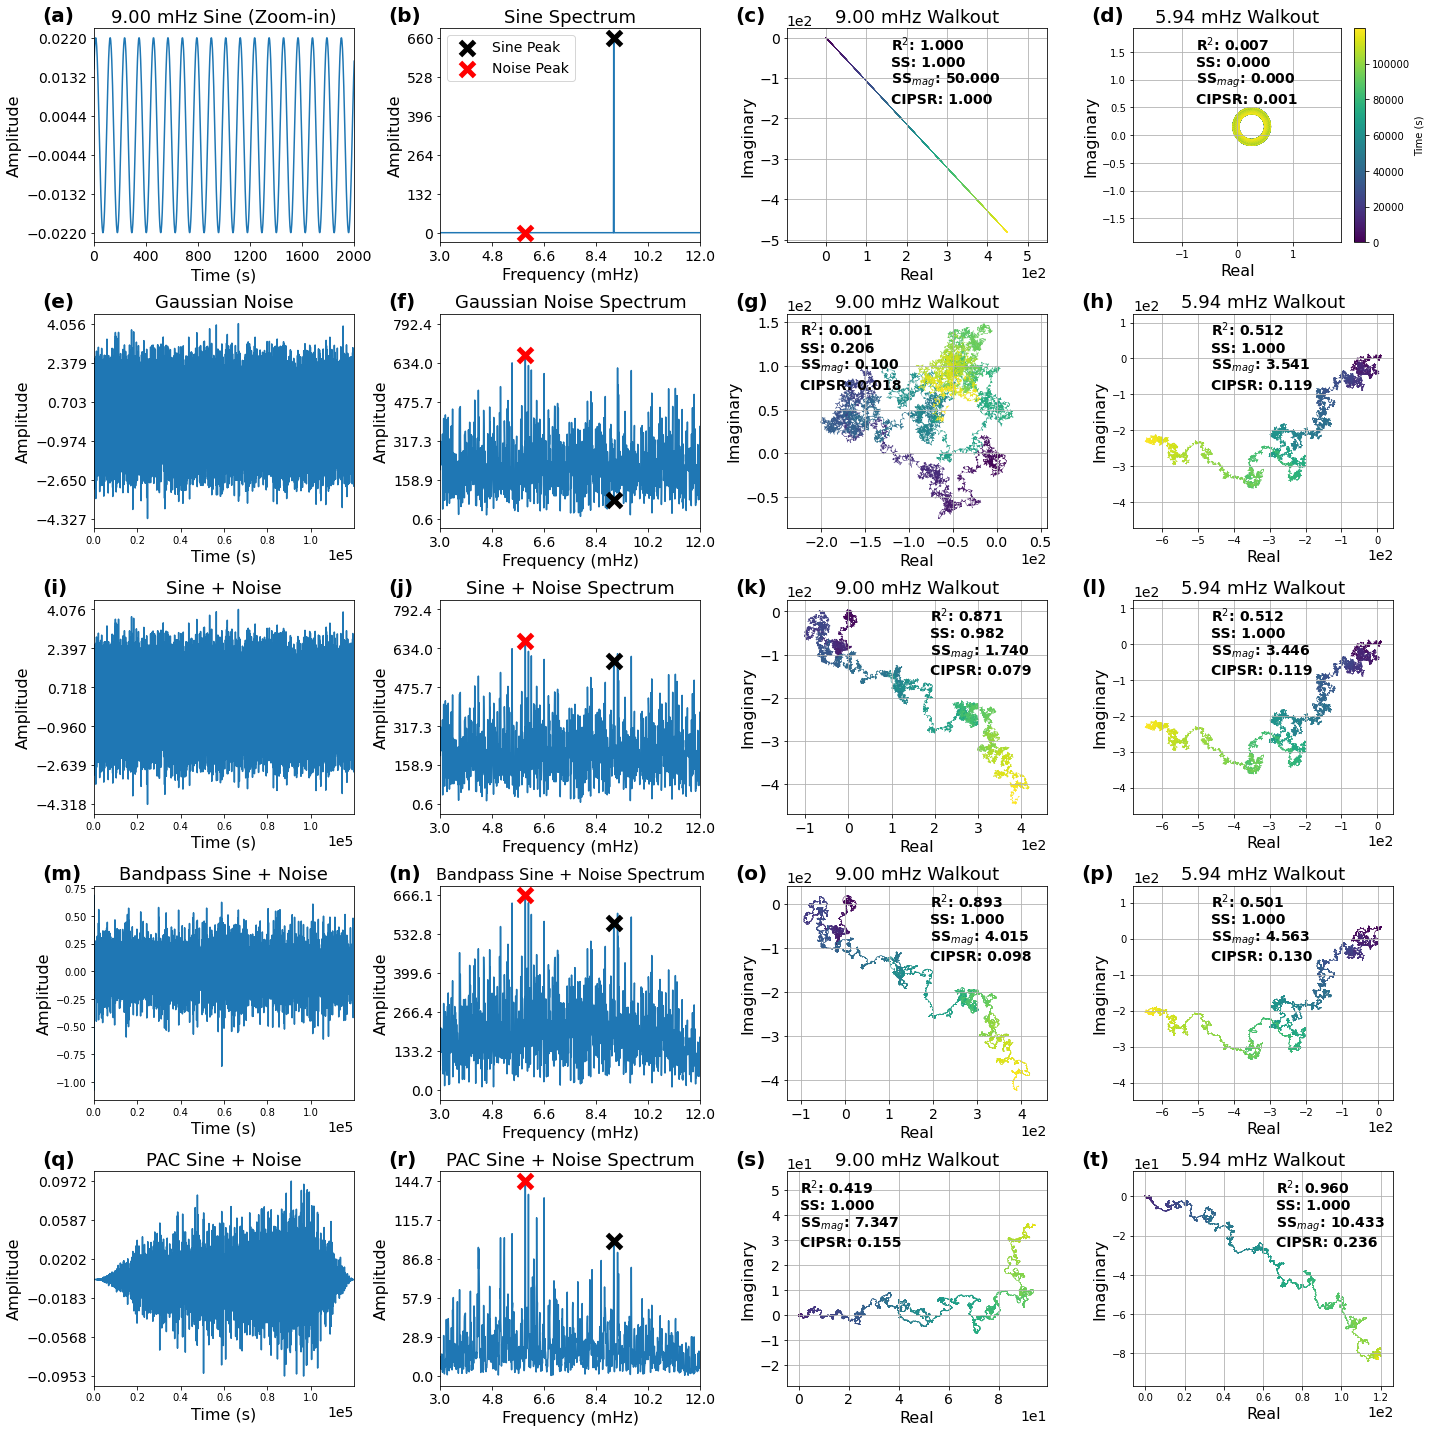

In [5]:
plt.figure(figsize=(20, 20))
plt.subplot(5, 4, 1)
# sine wave
plt.plot(t, sin_wave)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[1000]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('{:.2f} mHz Sine (Zoom-in)'.format(sin_wave_freq*1e3), fontsize=18)
plt.xticks(np.arange(t[0], t[1000]*1.0001, (t[1000]-t[0])/5), fontsize=14)
plt.yticks(np.arange(np.min(sin_wave), np.max(sin_wave)*1.0001, (np.max(sin_wave)-np.min(sin_wave))/5), fontsize=14)
# add (a) to the subplot
plt.text(-0.2, 1.03, '(a)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 2)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(sin_wave))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(sin_wave))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(sin_wave))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine Spectrum'.format(sin_wave_freq*1e3), fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (b) to the subplot
plt.text(-0.2, 1.03, '(b)', transform=plt.gca().transAxes, size=20, weight='bold')
plt.legend(fontsize=14, loc='upper left')

plt.subplot(5, 4, 3)
visualize_walkout_for_subplot(sin_wave, dt, target_freq_1)
R2 = calculate_walkout_R2(sin_wave, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(sin_wave, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(sin_wave, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.40, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (c) to the subplot
plt.text(-0.2, 1.03, '(c)', transform=plt.gca().transAxes, size=20, weight='bold')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')

plt.subplot(5, 4, 4)
visualize_walkout_for_subplot(sin_wave, dt, target_freq_2)
R2 = calculate_walkout_R2(sin_wave, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(sin_wave, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(sin_wave, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.30, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
plt.xlim([-2,2])
plt.ylim([-2,2])
# add (d) to the subplot
plt.text(-0.2, 1.03, '(d)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 5)
plt.plot(t, noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Gaussian Noise', fontsize=18)
plt.yticks(np.arange(np.min(noise), np.max(noise)*1.0001, (np.max(noise)-np.min(noise))/5), fontsize=14)
# add (e) to the subplot
plt.text(-0.2, 1.03, '(e)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 6)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(noise))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(noise))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(noise))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Gaussian Noise Spectrum', fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (f) to the subplot
plt.text(-0.2, 1.03, '(f)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 7)
visualize_walkout_for_subplot(noise, dt, target_freq_1)
R2 = calculate_walkout_R2(noise, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(noise, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.05, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (g) to the subplot
plt.text(-0.2, 1.03, '(g)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 8)
visualize_walkout_for_subplot(noise, dt, target_freq_2)
R2 = calculate_walkout_R2(noise, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(noise, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.30, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
# add (h) to the subplot
plt.text(-0.2, 1.03, '(h)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 9)
plt.plot(t, noise_plus_sin)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine + Noise', fontsize=18)
plt.yticks(np.arange(np.min(noise_plus_sin), np.max(noise_plus_sin)*1.0001, (np.max(noise_plus_sin)-np.min(noise_plus_sin))/5), fontsize=14)
# add (i) to the subplot
plt.text(-0.2, 1.03, '(i)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 10)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(noise_plus_sin))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(noise_plus_sin))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(noise_plus_sin))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine + Noise Spectrum', fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (j) to the subplot
plt.text(-0.2, 1.03, '(j)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 11)
visualize_walkout_for_subplot(noise_plus_sin, dt, target_freq_1)
R2 = calculate_walkout_R2(noise_plus_sin, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(noise_plus_sin, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise_plus_sin, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.55, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (k) to the subplot
plt.text(-0.2, 1.03, '(k)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 12)
visualize_walkout_for_subplot(noise_plus_sin, dt, target_freq_2)
R2 = calculate_walkout_R2(noise_plus_sin, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(noise_plus_sin, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise_plus_sin, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.30, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
# add (l) to the subplot
plt.text(-0.2, 1.03, '(l)', transform=plt.gca().transAxes, size=20, weight='bold')

# bandpass filter the data
lowpass_noise = butter_bandpass_filter(noise_plus_sin, lower_freq, upper_freq, fs, order=4)
lowpass_noise = lowpass_noise - np.mean(lowpass_noise)

plt.subplot(5, 4, 13)
plt.plot(t, lowpass_noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('Bandpass Sine + Noise', fontsize=18)
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14)
# add (m) to the subplot
plt.text(-0.2, 1.03, '(m)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 14)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(lowpass_noise))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.scatter(freqs[sin_peak_pos], np.abs(np.fft.fft(lowpass_noise))[sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(freqs[max_peak], np.abs(np.fft.fft(lowpass_noise))[max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Bandpass Sine + Noise Spectrum', fontsize=16)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (n) to the subplot
plt.text(-0.2, 1.03, '(n)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 15)
visualize_walkout_for_subplot(lowpass_noise, dt, target_freq_1)
R2 = calculate_walkout_R2(lowpass_noise, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(lowpass_noise, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_noise, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.55, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (o) to the subplot
plt.text(-0.2, 1.03, '(o)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 16)
visualize_walkout_for_subplot(lowpass_noise, dt, target_freq_2)
R2 = calculate_walkout_R2(lowpass_noise, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(lowpass_noise, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_noise, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.30, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
#plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap=c_map_code), label='Time (s)')
# add (p) to the subplot
plt.text(-0.2, 1.03, '(p)', transform=plt.gca().transAxes, size=20, weight='bold')

# phase autocorrelation
pac_lowpass_noise = acorr(lowpass_noise)
# taper the data
pac_lowpass_noise = pac_lowpass_noise - np.mean(pac_lowpass_noise)
pac_lowpass_noise = np.multiply(pac_lowpass_noise, signal.tukey(len(pac_lowpass_noise), alpha=0.5))

pac_t = t
pac_freqs = np.fft.fftfreq(len(pac_t), dt)
# find amplitude of the peak with maximum amplitude within the frequency range
fft_amp = np.abs(np.fft.fft(pac_lowpass_noise))
peaks, _ = find_peaks(fft_amp, distance=10)

peaks = peaks[np.logical_and(pac_freqs[peaks] > target_freq_2*0.8, pac_freqs[peaks] < target_freq_2*1.2)]
# sort the peaks by their amplitudes and select the top 3 peaks
peaks = peaks[np.argsort(fft_amp[peaks])][::-1]
pac_max_peak = peaks[0]

pac_sin_peak_pos = np.argmin(np.abs(pac_freqs - sin_wave_freq))

plt.subplot(5, 4, 17)
plt.plot(pac_t, pac_lowpass_noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([pac_t[0], pac_t[-1]])
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14) 
plt.ylabel('Amplitude', fontsize=16)
plt.title('PAC Sine + Noise', fontsize=18)
plt.yticks(np.arange(np.min(pac_lowpass_noise), np.max(pac_lowpass_noise)*1.0001, (np.max(pac_lowpass_noise)-np.min(pac_lowpass_noise))/5), fontsize=14)
# add (q) to the subplot
plt.text(-0.2, 1.03, '(q)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 18)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(pac_lowpass_noise))[:int(len(pac_freqs)/2)]
plt.plot(pac_freqs[:int(len(pac_freqs)/2)], spectrum_amp)
plt.scatter(pac_freqs[pac_sin_peak_pos], np.abs(np.fft.fft(pac_lowpass_noise))[pac_sin_peak_pos], color='k', marker='x', s=200, linewidth=5, zorder=10, label='Sine Peak')
plt.scatter(pac_freqs[pac_max_peak], np.abs(np.fft.fft(pac_lowpass_noise))[pac_max_peak], color='r', marker='x', s=200, linewidth=5, zorder=10, label='Noise Peak')
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('PAC Sine + Noise Spectrum', fontsize=18)
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (r) to the subplot
plt.text(-0.2, 1.03, '(r)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 19)
visualize_walkout_for_subplot(pac_lowpass_noise, dt, target_freq_1)
R2 = calculate_walkout_R2(pac_lowpass_noise, dt, target_freq_1)
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_noise, dt, target_freq_1)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_noise, dt, target_freq_1)
plt.title('{:.2f} mHz Walkout'.format(target_freq_1*1e3), fontsize=18)
plt.text(0.05, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (s) to the subplot
plt.text(-0.2, 1.03, '(s)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(5, 4, 20)
visualize_walkout_for_subplot(pac_lowpass_noise, dt, target_freq_2)
R2 = calculate_walkout_R2(pac_lowpass_noise, dt, target_freq_2)
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_noise, dt, target_freq_2)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_noise, dt, target_freq_2)
plt.title('{:.2f} mHz Walkout'.format(target_freq_2*1e3), fontsize=18)
plt.text(0.55, 0.65, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
# add (t) to the subplot
plt.text(-0.2, 1.03, '(t)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.tight_layout()
plt.savefig('./Figure5.jpg', dpi=600)
plt.show()
plt.close()